In [1]:
import pandas as pd
import seaborn as sns
import nltk

In [2]:
df=pd.read_csv('clickbait_data.csv')

In [3]:
df.head()

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1


In [4]:
df['clickbait'] = df['clickbait'].replace(to_replace=[1, 0], value=['Y','N'])

In [5]:
df.head()

,headline,clickbait
0,Should I Get Bings,Y
1,Which TV Female Friend Group Do You Belong In,Y
2,"The New ""Star Wars: The Force Awakens"" Trailer...",Y
3,"This Vine Of New York On ""Celebrity Big Brothe...",Y
4,A Couple Did A Stunning Photo Shoot With Their...,Y


In [6]:
df.describe()

,headline,clickbait
count,32000,32000
unique,32000,2
top,Should I Get Bings,N
freq,1,16001


In [7]:
df.groupby('clickbait').describe()

headline                                                            \
             count unique                                                top   
clickbait                                                                      
N            16001  16001  Bill Changing Credit Card Rules Is Sent to Oba...   
Y            15999  15999                                 Should I Get Bings   

                
          freq  
clickbait       
N            1  
Y            1

In [8]:
df['length']=df['headline'].apply(len)

In [9]:
df.head()

,headline,clickbait,length
0,Should I Get Bings,Y,18
1,Which TV Female Friend Group Do You Belong In,Y,45
2,"The New ""Star Wars: The Force Awakens"" Trailer...",Y,73
3,"This Vine Of New York On ""Celebrity Big Brothe...",Y,67
4,A Couple Did A Stunning Photo Shoot With Their...,Y,100


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

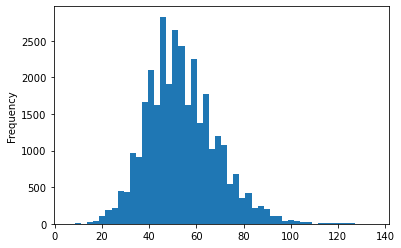

In [11]:
df['length'].plot.hist(bins=50)

In [12]:
df['length'].describe()

count    32000.000000
mean        53.797063
std         14.771455
min          6.000000
25%         44.000000
50%         52.000000
75%         63.000000
max        135.000000
Name: length, dtype: float64

array([<AxesSubplot:title={'center':'N'}>,
       <AxesSubplot:title={'center':'Y'}>], dtype=object)

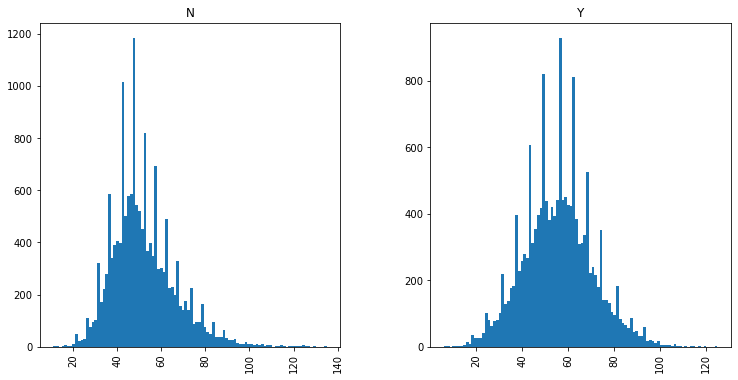

In [13]:
df.hist(column='length',by='clickbait',bins=100,figsize=(12,6))

In [14]:
import string
from nltk.corpus import stopwords

In [15]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
stopwords.words('English')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
def textprocess(mess):
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [18]:
df['headline'].head(5).apply(textprocess)

0                                         [Get, Bings]
1                  [TV, Female, Friend, Group, Belong]
2    [New, Star, Wars, Force, Awakens, Trailer, Giv...
3    [Vine, New, York, Celebrity, Big, Brother, Fuc...
4    [Couple, Stunning, Photo, Shoot, Baby, Learnin...
Name: headline, dtype: object

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
bow_transformer=CountVectorizer(analyzer=textprocess).fit(df['headline'])

In [21]:
print(bow_transformer.vocabulary_)

{'Get': 8483, 'Bings': 2639, 'TV': 19663, 'Female': 7532, 'Friend': 8093, 'Group': 8930, 'Belong': 2472, 'New': 13687, 'Star': 18964, 'Wars': 21600, 'Force': 7906, 'Awakens': 1959, 'Trailer': 20386, 'Give': 8573, 'Chills': 4118, 'Vine': 21361, 'York': 22203, 'Celebrity': 3851, 'Big': 2599, 'Brother': 3199, 'Fucking': 8142, 'Perfect': 14868, 'Couple': 4967, 'Stunning': 19277, 'Photo': 14992, 'Shoot': 18071, 'Baby': 2048, 'Learning': 11560, 'Inoperable': 10295, 'Brain': 3038, 'Tumor': 20618, 'Flirt': 7798, 'Queer': 15982, 'Girls': 8564, 'Without': 21961, 'Making': 12267, 'Total': 20322, 'Fool': 7888, '32': 398, 'Cute': 5267, 'Things': 20045, 'Distract': 6069, 'Awkward': 1975, 'Thanksgiving': 20006, 'Disney': 6029, 'Princesses': 15621, 'Florida': 7819, 'Whats': 21770, 'Quote': 16018, 'Lyric': 12098, 'Best': 2535, 'Describes': 5763, 'Depression': 5741, 'Natalie': 13566, 'Dormer': 6205, 'Sam': 17343, 'Claflin': 4252, 'Play': 15198, 'Game': 8296, 'See': 17704, 'Theyd': 20035, 'Actually': 925

In [22]:
df_bow=bow_transformer.transform(df['headline'])

In [23]:
df_bow.shape

(32000, 30045)

In [24]:
df_bow.nnz

201191

In [25]:
sparsity = (100.0 * df_bow.nnz / (df_bow.shape[0] * df_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.020926006823098687


In [26]:
from sklearn.feature_extraction.text import TfidfTransformer

In [27]:
tfidf=TfidfTransformer().fit(df_bow)

In [28]:
tfidf.idf_[bow_transformer.vocabulary_['university']]

9.294080889613756

In [29]:
df_tfidf=tfidf.transform(df_bow)

In [30]:
from sklearn.naive_bayes import MultinomialNB

In [31]:
click_bait=MultinomialNB().fit(df_tfidf,df['clickbait'])

In [32]:
all_pred=click_bait.predict(df_tfidf)

In [33]:
all_pred

array(['Y', 'Y', 'Y', ..., 'N', 'N', 'N'], dtype='<U1')

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
head_train,head_test,click_train,click_test=train_test_split(df['headline'],df['clickbait'],test_size=0.3, random_state=30)

In [36]:
# NAIVE BAYES CLASSIFIER

In [37]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=textprocess)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [38]:
pipeline.fit(head_train,click_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function textprocess at 0x7f9abcdef940>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [39]:
pred1=pipeline.predict(head_test)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(classification_report(click_test,pred1))

              precision    recall  f1-score   support

           N       0.99      0.93      0.96      4844
           Y       0.93      0.99      0.96      4756

    accuracy                           0.96      9600
   macro avg       0.96      0.96      0.96      9600
weighted avg       0.96      0.96      0.96      9600



In [42]:
print(confusion_matrix(click_test,pred1))

[[4514  330]
 [  61 4695]]


In [43]:
# SUPPORT VECTOR MACHINE

In [44]:
from sklearn.svm import SVC

In [45]:
from sklearn.pipeline import Pipeline

pipeline2 = Pipeline([
    ('bow', CountVectorizer(analyzer=textprocess)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  
])

In [46]:
pipeline2.fit(head_train,click_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function textprocess at 0x7f9abcdef940>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [47]:
pred2=pipeline2.predict(head_test)

In [48]:
print(classification_report(click_test,pred2))

              precision    recall  f1-score   support

           N       0.95      0.98      0.97      4844
           Y       0.98      0.95      0.96      4756

    accuracy                           0.96      9600
   macro avg       0.96      0.96      0.96      9600
weighted avg       0.96      0.96      0.96      9600



In [49]:
print(confusion_matrix(click_test,pred2))

[[4735  109]
 [ 231 4525]]


In [50]:
# LOGISTIC REGRESSION CLASSIFIER

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
pipeline3 = Pipeline([
    ('bow', CountVectorizer(analyzer=textprocess)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  
])

In [53]:
pipeline3.fit(head_train,click_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function textprocess at 0x7f9abcdef940>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [54]:
pred3=pipeline3.predict(head_test)

In [55]:
print(classification_report(click_test,pred3))

              precision    recall  f1-score   support

           N       0.94      0.98      0.96      4844
           Y       0.97      0.94      0.95      4756

    accuracy                           0.96      9600
   macro avg       0.96      0.96      0.96      9600
weighted avg       0.96      0.96      0.96      9600



In [56]:
print(confusion_matrix(click_test,pred3))

[[4724  120]
 [ 302 4454]]
